#생선을 분류 하는 실습 코드

In [ ]:
# http://bit.ly/bream_list 에서 복붙하기(생선의 길이, 생선의 무게)
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight)
plt.xlabel("fish length")
plt.ylabel("fish weight")
plt.show()

# 빙어 데이터 추가하기


In [ ]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

# 두 종류의 생선 그래프를 동시에 출력해보자
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel("fish length")
plt.ylabel("fish weight")
plt.show()

In [ ]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

# 사이킷런을 쓰기 위해서 데이터 전처리를 해준다.
fish_data = [[l,w] for l,w in zip(length, weight)]

# 지도학습의 특징인 정답 데이터를 만들어 준다. (도미:1, 빙어:0 으로 처리)
fish_answer = [1]*35 + [0]*14

# 사이킷런 패키지 import 하기
from sklearn.neighbors import KNeighborsClassifier

# kn 객체를 생성한뒤, fish data, fish_answer를 학습시킨다.(훈련 준비)
kn = KNeighborsClassifier()
kn.fit(fish_data, fish_answer)    #데이터 넣기(2차원 데이터, 분류결과)

print(kn.score(fish_data, fish_answer))    # 모델 평가하기(알고리즘을 구체화해서 표현한것)

print(kn.predict([[30, 600]]))    # 새로운 데이터를 넣어본뒤, 결과를 예측한다. (길이가 30, 무게가 600)

print(kn._fit_X)    #학습된 데이터를 출력
print(kn._y)    #해당 데이터의 레이블 출력


In [15]:
# 49개중 35개가 도미 이다. 이때 k-최근접 이웃을 비교하는 이웃 개수를 49개로 늘려보겠습니다.(5개 --> 49개(전체보기한다는 말))

kn49 =KNeighborsClassifier(n_neighbors=49)    # 참고 데이터개수를 49개로 늘린다.
kn49.fit(fish_data, fish_answer)

kn49.score(fish_data, fish_answer)    # 정확도가 49분에 35이다. (35개의 도미, 14개의 빙어를 가진 데이터를 넣는다면 학습시킨것에 넣으면)
# 이 모델은 도미가 몇개인지 카운트 하기 때문에 35개는 도미, 14개도 도미(실제정답은 빙어, False Positive인 상황)로 인식하기에 이런정확도가 나온다.

0.7142857142857143

# 최종 결과를 출력하자

In [ ]:

plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter(30, 600, marker='^')     # 가로범위, 세로범위, 마크는 세모를 쓰시오~ 하는것과 같은 효과?

plt.xlabel('length')
plt.ylabel('weight')
plt.show()    # 그래프 출력

kn.predict([[30,600]])    # 쿼리문 던지기

print(kn._fit_X)    # 학습된 입력 데이터 정보
print(kn._y)    # 정답 클래스 출력하기


# 전체 실습 코드

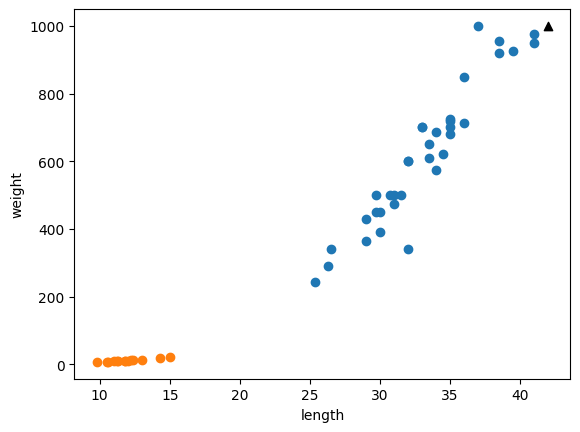

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]] --> 학습된 X값(생선 길이,무게)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0] --> 학습된 y값(클래스 분류 결과)
0.7142857142857143 -->

In [7]:
# 도미의 길이, 무게 리스트 35개
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

# 빙어의 길이와 무게 리스트 14개
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]


import matplotlib.pyplot as plt    # 그래프 그림을 그릴때 쓰는 라이브러리 호출(맷플롯립 )
from sklearn.neighbors import KNeighborsClassifier     # K-최근접 이웃 분류 알고리즘 호출(사이킷런 머신러닝 패키지)

All_fish_length=bream_length + smelt_length
All_fish_weight=bream_weight + smelt_weight
All_fish_answer = [1]*35+[0]*14    # Superviser 학습을 위한 정답지 만들기 (1이면 도미, 0이면 빙어이다.)
All_data = [[a,b] for a,b in zip(All_fish_length, All_fish_weight)]    # 사이킷런 활용을 위한 2차원 리스트 쌍 [[길이,무게], [길이,무게]...]

kn = KNeighborsClassifier()    # K-최근접 이웃분류 클래스 인스턴스화 하기 (n_neighbors=15를 클래스 괄호 안에 넣어주면 이웃체크수 15개로 변경 가능)
kn.fit(All_data, All_fish_answer)    # 데이터 학습시키기
kn.score(All_data, All_fish_answer)    # 학습율을 물어본다. (만약 n_neighbors=49이면, 35마리의 도미가 대다수를 차지하므로 무조건 도미로 판단하여, 35/49으로 학습율이 나타난다(정확도 Accuracy에 해당한다!))
kn.predict([[42,1000]])    # 길이가 42, 무게가 1000 인 생선이 어떻게 분류되는지 질의를 던짐(학습되지 않는 처음 만나는 데이터)


# 그래프 그리기 시작 (scatter를 활용해 산점도 형태로 그린다.)
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter(42,1000, marker='^', c='k')    # 내가 질의를 던진 좌표만 삼각형점으로 사용함
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

print(kn._fit_X, "--> 학습된 X값(생선 길이,무게)")    # 학습된 X값(생선 길이,무게)출력
print(kn._y, '--> 학습된 y값(클래스 분류 결과)')    # 학습된 y값(클래스 분류 결과) 출력

kn49 = KNeighborsClassifier(n_neighbors=49)    # 체크하는 이웃의 개수를 49개로 늘린다. (모든 판정 결과가 도미가 되어버림)
kn49.fit(All_data, All_fish_answer)    # 학습을 진행한다.
print(kn49.score(All_data, All_fish_answer), '--> 49개의 이웃체크를 하는 모델의 학습율')

In [8]:
knkn = KNeighborsClassifier()
knkn.fit(All_data, All_fish_answer)

for p in range(5,50):
    knkn.n_neighbors = p
    now_score = knkn.score(All_data, All_fish_answer)

    if now_score<1:
        print(now_score)
        break

0.9795918367346939
